In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

### EDA

In [3]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum() #We examine the empty lines.

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [6]:
df["Loan Status"].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

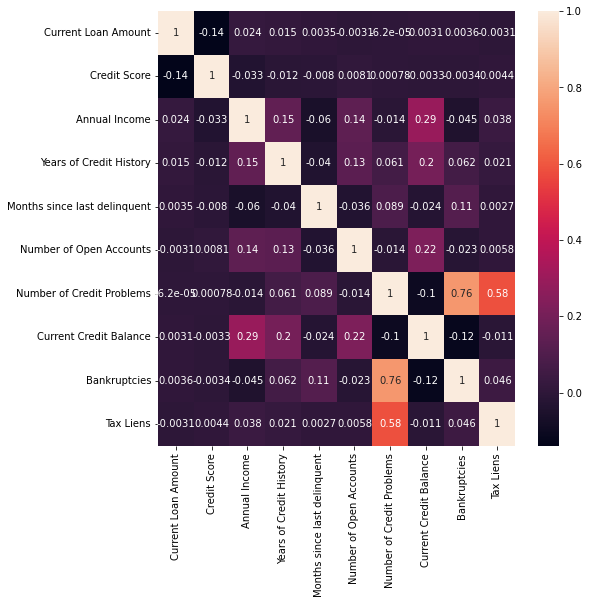

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

### Data Visualization and Feature Engineering

In [8]:
d={"Fully Paid":1,"Charged Off":0}
df["Loan Status"]=df["Loan Status"].map(d)
#We change the Fully Paid values in Loan Status to 1 and the Charged Off values to 0.

In [9]:
abs(df.corr()["Loan Status"].sort_values(ascending=False)) #We look at their correlations.

Loan Status                     1.000000
Current Loan Amount             0.269804
Annual Income                   0.070328
Years of Credit History         0.035548
Months since last delinquent    0.023541
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Number of Credit Problems       0.010179
Tax Liens                       0.012585
Number of Open Accounts         0.020787
Credit Score                    0.440307
Name: Loan Status, dtype: float64

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

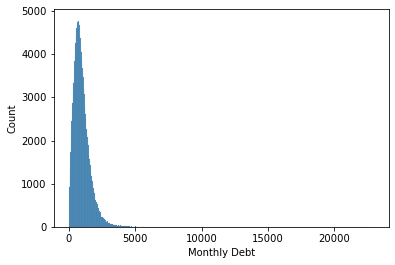

In [10]:
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True) #We remove the $ sign in the data.
df['Monthly Debt']=df['Monthly Debt'].astype(float) #We change the type to float.
sns.histplot(df['Monthly Debt']) 

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

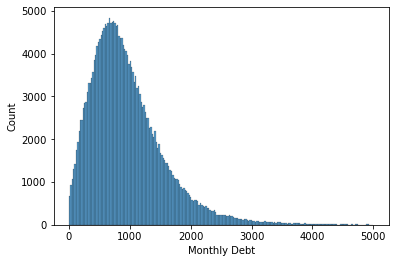

In [11]:
df=df[df['Monthly Debt']<5000]
sns.histplot(df['Monthly Debt'])

In [12]:
df["Years in current job"].value_counts()

10+ years    78804
2 years      23449
< 1 year     21000
3 years      20641
5 years      17841
1 year       16731
4 years      16150
6 years      14577
7 years      13959
8 years      12198
9 years       9919
Name: Years in current job, dtype: int64

In [13]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True) 
#We fill the empty lines in the Credit Score with the mean value.

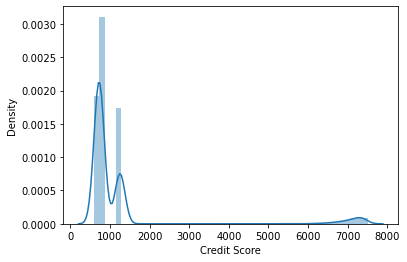

In [14]:
sns.distplot(df['Credit Score']);

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

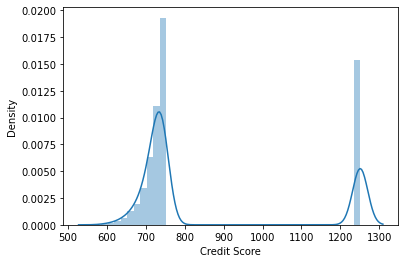

In [15]:
df=df[df['Credit Score']<2000] #We delete values above 2000 in the credit score.
sns.distplot(df['Credit Score'])

In [16]:
df['Annual Income'].fillna(0,inplace=True)

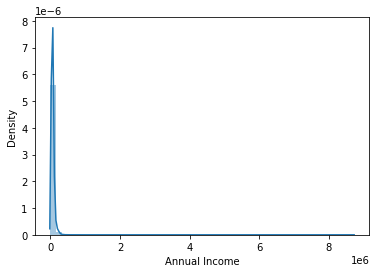

In [17]:
sns.distplot(df['Annual Income']);

In [18]:
df['Months since last delinquent'].fillna(0,inplace=True)

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

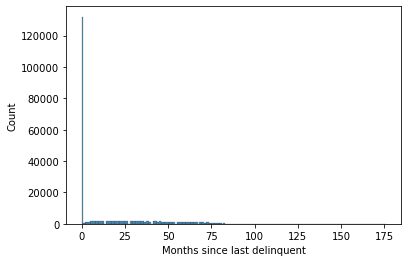

In [19]:
sns.histplot(df['Months since last delinquent'])

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

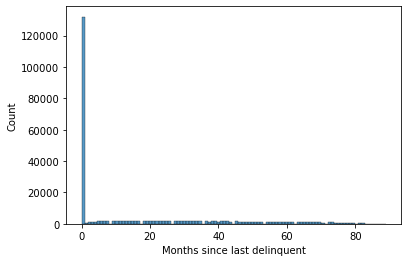

In [20]:
df=df[df['Months since last delinquent']<90]
sns.histplot(df['Months since last delinquent'])

In [21]:
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True) #We remove text other than numbers in the data.
df['Years in current job'].fillna('0',inplace=True)
df['Years in current job']=df['Years in current job'].astype(int)

<AxesSubplot:xlabel='Years in current job', ylabel='Count'>

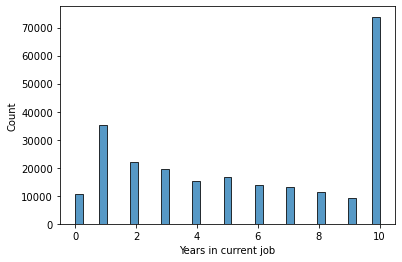

In [22]:
sns.histplot(df['Years in current job'])

In [23]:
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
#We are removing the texts in Maximum Open Credit.
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Density'>

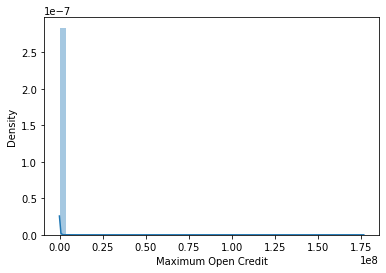

In [24]:
sns.distplot(df['Maximum Open Credit'])

In [25]:
df['Bankruptcies'].fillna("0",inplace=True)
df['Bankruptcies']=df['Bankruptcies'].astype(int)

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

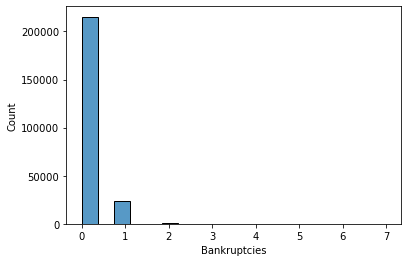

In [26]:
sns.histplot(df['Bankruptcies'])

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

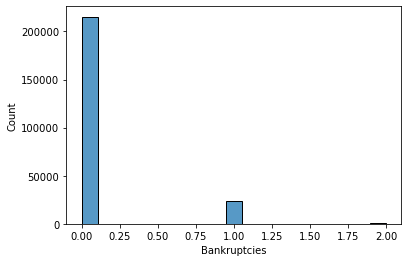

In [27]:
df=df[df['Bankruptcies']<3]
sns.histplot(df['Bankruptcies'])

In [28]:
df['Tax Liens'].fillna("0",inplace=True)
df['Tax Liens']=df['Tax Liens'].astype(int)

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

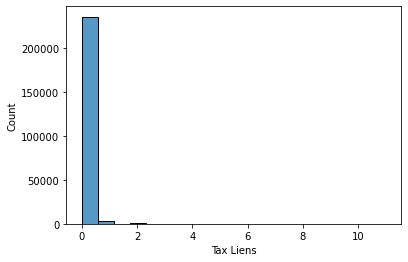

In [29]:
sns.histplot(df['Tax Liens'])

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

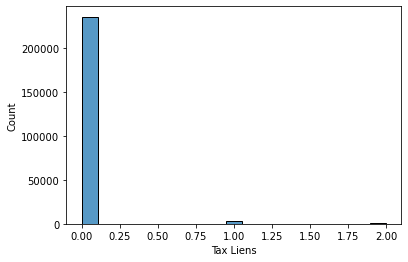

In [30]:
df=df[df['Tax Liens']<3]
sns.histplot(df['Tax Liens'])

In [31]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [32]:
abs(df.corr()["Loan Status"].sort_values(ascending=False))

Loan Status                     1.000000
Current Loan Amount             0.250491
Annual Income                   0.079548
Years of Credit History         0.034725
Years in current job            0.020710
Current Credit Balance          0.009996
Maximum Open Credit             0.007773
Bankruptcies                    0.000405
Months since last delinquent    0.000162
Number of Credit Problems       0.008780
Tax Liens                       0.010549
Monthly Debt                    0.015785
Number of Open Accounts         0.019751
Credit Score                    0.040487
Name: Loan Status, dtype: float64

In [33]:
df['Home Ownership'].value_counts() 

Home Mortgage    116914
Rent             101032
Own Home          21332
HaveMortgage        539
Name: Home Ownership, dtype: int64

In [34]:
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)
df['Home Ownership'].value_counts()

Mortgage    117453
Rent        101032
Own Home     21332
Name: Home Ownership, dtype: int64

In [35]:
df['Purpose'].value_counts()

Debt Consolidation      190288
Home Improvements        14012
other                    13238
Other                     9104
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

In [36]:
df['Purpose'].replace('other','Other',inplace=True)
df['Purpose'].value_counts()

Debt Consolidation      190288
Other                    22342
Home Improvements        14012
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239817 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       239817 non-null  object 
 1   Customer ID                   239817 non-null  object 
 2   Loan Status                   239817 non-null  int64  
 3   Current Loan Amount           239817 non-null  int64  
 4   Term                          239817 non-null  object 
 5   Credit Score                  239817 non-null  float64
 6   Years in current job          239817 non-null  int32  
 7   Home Ownership                239817 non-null  object 
 8   Annual Income                 239817 non-null  float64
 9   Purpose                       239817 non-null  object 
 10  Monthly Debt                  239817 non-null  float64
 11  Years of Credit History       239817 non-null  float64
 12  Months since last delinquent  239817 non-nul

### Classification

In [38]:
x=df.drop(['Loan ID','Customer ID','Loan Status'],axis=1)

In [39]:
y=df[["Loan Status"]]

In [40]:
x=pd.get_dummies(x,drop_first=True)

In [41]:
x

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,741.000000,10,33694.0,584.03,12.3,41.0,10,0,6760,16056.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,3441,734.000000,4,42269.0,1106.04,26.3,0.0,17,0,6262,19149.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21029,747.000000,10,90126.0,1321.85,28.8,0.0,5,0,20967,28335.0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,18743,747.000000,10,38072.0,751.92,26.2,0.0,9,0,22529,43915.0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,11731,746.000000,4,50025.0,355.18,11.5,0.0,12,0,17391,37081.0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,11953,717.000000,10,39844.0,982.82,11.7,0.0,9,1,4176,4783.0,1,0,1,0,0,0,0,1,0,0,0,0,0
256979,3911,1251.188242,2,0.0,1706.58,19.9,0.0,16,0,43992,44080.0,0,0,1,0,1,0,0,1,0,0,0,0,0
256980,5078,737.000000,10,77186.0,1376.47,19.1,47.0,9,0,1717,9758.0,0,0,1,1,0,0,0,1,0,0,0,0,0
256982,12116,746.000000,9,52504.0,297.96,15.1,82.0,8,0,3315,20090.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [42]:
g=GaussianNB()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
g.fit(x_train,y_train)    
confusion_matrix(g.predict(x_test),y_test)

array([[12792, 27948],
       [   41,  7183]], dtype=int64)

In [43]:
b=BernoulliNB()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
b.fit(x_train,y_train)    
confusion_matrix(b.predict(x_test),y_test)

array([[  373,   296],
       [12460, 34835]], dtype=int64)

In [44]:
k=KNeighborsClassifier()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
k.fit(x_train,y_train)    
confusion_matrix(k.predict(x_test),y_test)

array([[ 4130,  5454],
       [ 8703, 29677]], dtype=int64)

In [45]:
l=LogisticRegression()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
l.fit(x_train,y_train)    
confusion_matrix(l.predict(x_test),y_test)

array([[   12,    37],
       [12821, 35094]], dtype=int64)

In [46]:
d=DecisionTreeClassifier()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
d.fit(x_train,y_train)    
confusion_matrix(d.predict(x_test),y_test)

array([[ 7885,  7157],
       [ 4948, 27974]], dtype=int64)

In [47]:
r=RandomForestClassifier()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
r.fit(x_train,y_train)    
confusion_matrix(r.predict(x_test),y_test)

array([[ 6510,  1727],
       [ 6323, 33404]], dtype=int64)

In [48]:
gb=GradientBoostingClassifier()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
gb.fit(x_train,y_train)    
confusion_matrix(gb.predict(x_test),y_test)

array([[ 2551,  1732],
       [10282, 33399]], dtype=int64)

In [49]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [50]:
classification_funct(x,y)

(191853, 24) (47964, 24) (191853, 1) (47964, 1)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.892964,0.951170,0.841471,0.832541
XGBClassifier,0.847347,0.926840,0.780413,0.754754
LogisticRegression,0.846555,0.999120,0.734412,0.734009
BernoulliNB,0.845929,0.990347,0.738270,0.735072
DecisionTreeClassifier,0.821598,0.795509,0.849456,0.746289
KNeighborsClassifier,0.808255,0.845531,0.774127,0.705383
GaussianNB,0.343040,0.207188,0.996314,0.417209


In [51]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
a=df[["Purpose","Home Ownership","Term","Current Loan Amount","Annual Income"]]
b=df[["Loan Status"]]

In [53]:
a=pd.get_dummies(a,drop_first=True)

In [54]:
a.shape

(239817, 13)

In [55]:
model=Sequential()
model.add(Dense(13,activation="relu"))
model.add(Dense(26,activation="relu"))
model.add(Dense(52,activation="relu"))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [56]:
model.fit(a,b,epochs=10,validation_split=0.20,batch_size=10,verbose=1)

Epoch 1/10
19186/19186 [==============================] - 22s 1ms/step - loss: 2.3858 - accuracy: 0.7291 - val_loss: 0.5759 - val_accuracy: 0.7376
Epoch 2/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5758 - val_accuracy: 0.7376
Epoch 3/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5756 - val_accuracy: 0.7376
Epoch 4/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5758 - val_accuracy: 0.7376
Epoch 5/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5756 - val_accuracy: 0.7376
Epoch 6/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5757 - val_accuracy: 0.7376
Epoch 7/10
19186/19186 [==============================] - 21s 1ms/step - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 26)                364       
                                                                 
 dense_2 (Dense)             (None, 52)                1404      
                                                                 
 dense_3 (Dense)             (None, 7)                 371       
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 2,329
Trainable params: 2,329
Non-trainable params: 0
_________________________________________________________________


In [58]:
scores=model.evaluate(a,b)

7495/7495 [==============================] - 5s 703us/step - loss: 0.5814 - accuracy: 0.7319


In [59]:
scores[0]

0.5814388990402222

In [60]:
scores[1]

0.7318747043609619